## Team: What the Hack (Team 2)

### Team Members: Donye Biddings, Donghyeon Kim, Chibuogo Mojekwu, Shruthi Saravanan

<span style="color:blue; font-size:2em;"> **SETUP** </span>

[You can remove this text from the final report. This is just to help you set up correctly.] 

Some tips for using jupyter notebook:
1. Check whether you are in code or markdown mode in each cell of the report. You can switch between them by clicking on the dropdown.
2. To plot figures, use plot_data() defined below. If you need to insert an image using markdown, you can use this code: `![title](image_folder/image_name.png)`
3. You should not have to edit the python files in the github repository for any of the tasks below. We have shared them just in case though.

In [2]:
# this function creates all in-line plots. DO NOT DELETE.
!pip install -q condacolab
!pip install matplotlib

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt


def plot_data(data):
    # adjust rcParams as needed to make your graph readable
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.title('X,Y,Z Plot')
    plt.plot([row[0] for row in data],[row[1] for row in data], label="x")
    plt.plot([row[0] for row in data],[row[2] for row in data], label="y")
    plt.plot([row[0] for row in data],[row[3] for row in data], label="z")
    plt.legend(loc='upper right')
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


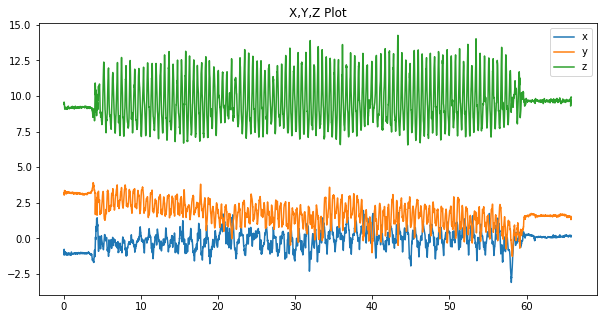

In [3]:
# this file is test.py
import parser_data
# numpy imported to check if the student has numpy
import numpy as np


data = parser_data.get_data("walking_steps_2.csv")
# print(data)
plot_data(data)

<span style="color:blue; font-size:2em;"> **TASK 1** </span>

### INSTRUCTIONS

**In your report** <br>

Calculate: <br> 

**a. [3 points]** Open walking_steps.csv collected and check relative_time column. What is the sampling rate for the accelerometer data?


In [4]:
data = parser_data.get_data("walking_steps_1.csv")
totaltime = data[len(data) - 1][0] - data[0][0]
length = len(data)
samplingrate = length/totaltime
print(samplingrate)


100.78568341704984


The average sampling rate for the accelerometer data is approximately 100.786 data points per second. 

**b. [3 points]** Is the sampling rate stable for the file walking_steps.csv? What is the variation? If it is not stable, explain what could be affecting the stability of the rate? (Hint: https://pure.au.dk/ws/files/93103132/sen099_stisenAT3.pdf, no need to thoroughly read the whole paper, this is just to lead you to think in the right direction. Looking at the first two pages should be sufficient) <br> 

In [5]:
arr = []

for x in range (len(data) - 1):
  if (data[x+1][0] - data[x][0]) != 0:
    point = 1/(data[x+1][0] - data[x][0])
    arr.append(point)
variance = np.var(arr)
print(variance)




1907.462816364699


**c. ** How does your understanding from part (a) affect your data processing pipeline? <br> 
		



**d. **  How can we make the data easier to work with (hint: re-sampling the data)? Choose one method of your choice and briefly explain how the math works. <br> 

One way to make the data easier to work with is by re-sampling it. Down sampling helps out data by reducing the wasting/the number of samples in the majority class to match the number of samples in the minority class. This can help balance the class distribution and prevent overfitting.

**e. ** Do you think the current  sampling rate is a good basis for capturing human movements like walking?  Explain your reasons for or against your case.<br> 

I think the current sampling rate is not a good basis for capturing human movements like walking because  human movements, like walking, are not constant or regular. They vary depending on factors such as the person's speed, stride length, and gait. A stable sampling rate may not be able to capture these variations.


<span style="color:blue; font-size:2em;"> **TASK 2** </span>

### INSTRUCTIONS

**In your report** <br>
**a. [5 points]** Plot X, Y, Z  for walking_steps.csv and walking_steps_clean.csv <br>
**b. [5 points]** Plot X, Y, Z  for walking_steps2.csv and walking_steps_clean2.csv <br>
**c. [5 points]** Reflect on the movements in each axis, X, Y, Z of walking_steps_clean.csv. Give details as to how you collected the data and it resulted in movement in each axis.  <br>

**Code and Data files** <br>
In folder /data - Add walking_steps_clean.csv<br>
task2.py - Modify code clean_data below

**Note : Make sure you add/modify code below or your task 2 will not be graded.**  

Write code to remove garbage data
Create new file without garbage data and save it in data folder


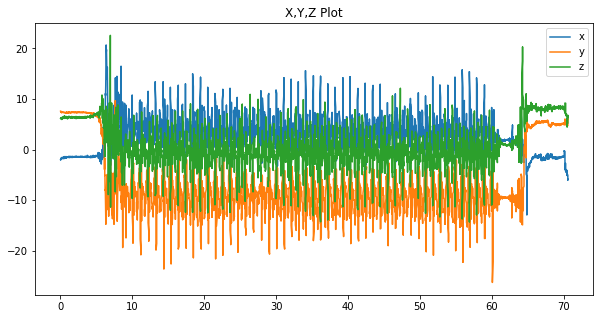

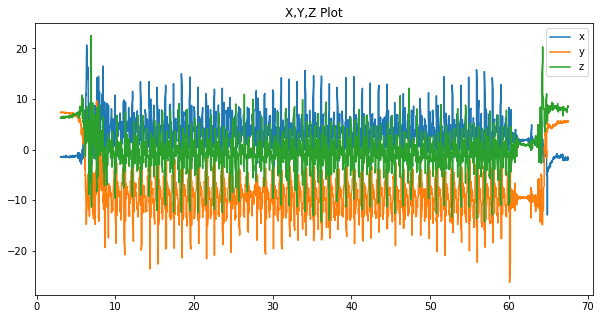

Write code to remove garbage data
Create new file without garbage data and save it in data folder


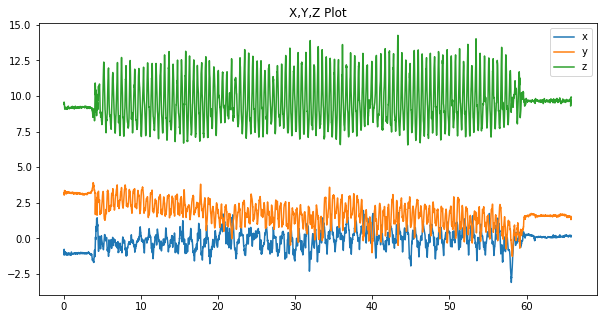

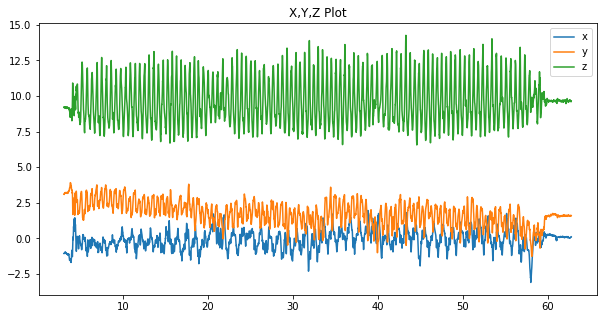

In [6]:
# this is task2.py
import parser_data


def clean_data(data, num=None):
    print ("Write code to remove garbage data")
    first = data[0][0]
    last = data[len(data) - 1][0]
    tmp = []
    
    for i in range(len(data)):
      if (data[i][0] > (3 + first) and data[i][0] < (last - 3)):
        tmp.append(data[i])
    # print(tmp)

    print ("Create new file without garbage data and save it in data folder")
    file_name_clean = "walking_steps_clean.csv"
    if num is not None:
        file_name_clean = f"data/walking_steps_{num}_clean.csv" 
        with open(file_name_clean, "w") as f:
            f.write("time,X,Y,Z\n")
            # write your cleaned data to the file
            for i in range(len(tmp)):
              f.write(str(tmp[i][0]) + "," + str(tmp[i][1]) + "," + str(tmp[i][2]) + "," + str(tmp[i][3]) + "\n")



def main():
    # Get data
    for i in [1,2]:
        file_name = f"walking_steps_{i}.csv" # Change to your file name 
        data = parser_data.get_data(file_name) #data -- time,X,Y,Z 
        clean_data(data, i)
        newdata = parser_data.get_data(f"walking_steps_{i}_clean.csv")
        
        # Plot original and clean data
        def get_data(file_name):
            inputfile = open("data/" + file_name, "r+")
            data = []
            for i in range(3):
                inputfile.readline()  # use next() if 2.7. Skip the first few samples
            for line in inputfile:
                splits = line.split(",")
                data.append((float(splits[0]),float(splits[1]), float(splits[2]), float(splits[3])))
            return data 

        # numpy imported to check if the student has numpy
        import numpy

        
        data = get_data(f"walking_steps_{i}.csv")
        plot_data(data)

        data2 = get_data(f"walking_steps_{i}_clean.csv")
        plot_data(data2)


if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 3** </span>

### INSTRUCTIONS

**In your report** <br>

**a. [6 points - 2 for each plot and 2 for reflection]**  <br>
Add the plot for magnitude for walking_steps_1_clean.csv and walking_steps_2_clean.csv.  <br>

1. Reflect how magnitude is different from X,Y,Z. 
2. How are the magnitudes different in the 2 files? (hint: orientation)<br>

**b. [6 points - 2 for each plot and 2 for reflection]**  <br>
Add the plot for moving average for for walking_steps_1_clean.csv and walking_steps_2_clean.csv using the method you implemented. 

1. How the moving average is different from magnitude.  <br>
2. On what factor(s) does moving average dependent? 

**c. [8 points]** Describe your step counting process.  <br>

**d. [10 points - 5 each]** Run walking_steps_clean.csv through your algorithm. How many steps did you count? Plot your raw data with steps labeled on it  <br>
1. walking_steps_1_clean.csv through your algorithm. 
2. walking_steps_2_clean.csv through your algorithm. 


**e. [10 points]** Reflect on how your calculations are different from ground truth data (100 steps).   <br>

**Code**  <br>
1. **util.py** - modify to implement functions vector_magnitude, moving_average below <br>
2. **task3.py**  - implement count_steps below <br>

**Note : Make sure you add/modify code below or your task 3 will not be graded.**  

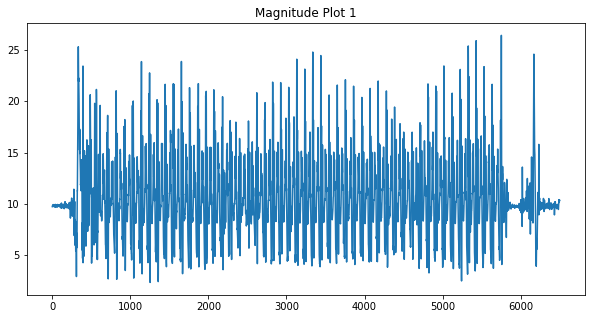

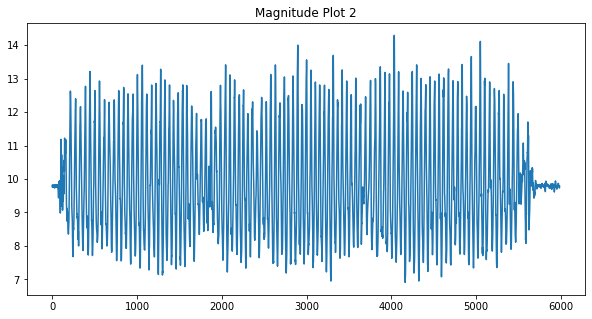

In [7]:
# this is util.py

from scipy.signal import butter, lfilter
import numpy
import math
import matplotlib.pyplot as plt


def vector_magnitude(data):
    """ function to calculate the magnitude of a vector

    Calculate the magnitude of the vector superposition of data (for
    example, acceleration) on x, y, and z axis

    Arguments:
        data: array of (x, y, z) tuples for a vector

    Returns:
        array of the magnitude of a vector

    """
    tmp = []
    for i in range(len(data)):
      add = numpy.sqrt(data[i][1] ** 2 + data[i][2] ** 2 + data[i][3] ** 2)
      tmp.append(add)

    return tmp
  

def main():
    
  for i in [1,2]:
        file_name = f"walking_steps_{i}_clean.csv" 
        data = parser_data.get_data(file_name)
        tmp = vector_magnitude(data)
        plt.rcParams['figure.figsize'] = [10, 5]
        plt.title(f'Magnitude Plot {i}')
        plt.plot(tmp)
        plt.show()


if __name__== "__main__":
    main()

  

In [23]:


def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size
    """ moving average filter
  
    Implement a simple moving average filter to use as a low pass
    filter

    Arguments:
        data: data be filtered
        window_size: window_size chosen for the data
  
    Returns:
        The filtered data.

    TODO:
        Finish this function. Think about how you want to handle
        the size difference between your input array and output array.
        You can write it yourself or consider using numpy.convole for
        it:
        https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """




    # raise NotImplementedError

    data = pd.Series(data)
    print(data.rolling(window_size).mean())
    return data.rolling(window_size).mean()
  
    

Accelerometer data graph


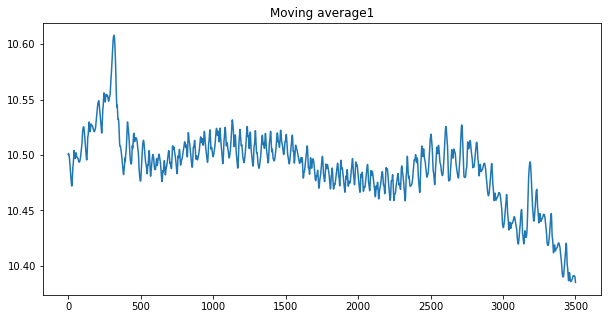

Number of steps counted are : 162
Accelerometer data graph


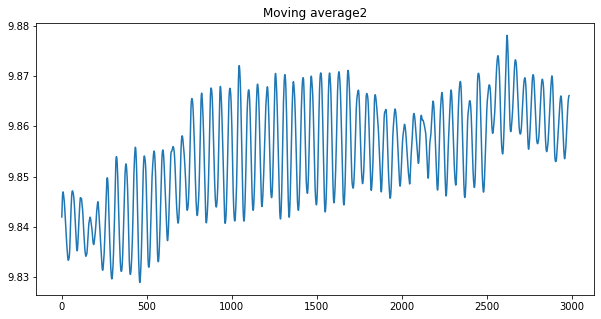

Number of steps counted are : 59


In [30]:
# this is task3.py
import parser_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import math

steps = []
def count_steps(data):
    print("Accelerometer data graph")
    # plot_data(data)
    num_steps = 0
    
    '''
    scipy function
    ADD YOUR CODE HERE. This function counts the number of steps in data and returns the number of steps
    '''

    for i in range(len(data)):
      if i == 0 or i == (len(data) - 1):
        num_steps = num_steps + 1
      elif ((data[i] > data[i - 1]) and (data[i] > data[i+1])):
        num_steps = num_steps + 1
        steps.append(i)

    
    return num_steps


def main():
    # Get data
    for a in [1,2]:
        file_name = f"walking_steps_{a}_clean.csv" 
        data = parser_data.get_data(file_name)
        mags = vector_magnitude(data)

        #print(mags)
 
        if a == 1:
            window = 3500
        else:
            window = 3000

        tmp_data = moving_average(mags, 3000)
        numstep_data = []

        number_of_steps = count_steps(tmp_data)
        plt.rcParams['figure.figsize'] = [10, 5]
        plt.title('Moving average' + str(a))
        plt.plot(tmp_data)
        plt.show()




        print("Number of steps counted are : {0:d}".format(number_of_steps))

    
  

if __name__== "__main__":
    main()



<span style="color:blue; font-size:2em;"> **TASK 4** </span>

### INSTRUCTIONS
**In your report** <br>
a. **[10 points]** Explain your algorithm for segmentation, with rationale.  <br>
b. **[5 points]** Plot of pre-segmented data.  Plot segmented data for climbing and walking. Make sure the way you plot (colors/ boxes/lines) easily differentiates the two. <br>
c. **[5 points]** What was the difference in the step counting method from task 3? <br>
d. **[5 points]** How many steps of stairs did you count? Plot labeled data for climbed steps. <br>
e. **[5 points]** Reflect on this exercise and compare it with what you learned in class. (hint: bulling’s activity recognition chain) <br>


**Code and Data files** <br>
In folder /data - Add climbing_steps.csv <br>
Task4.py - modify segment_climbing_walking, count_steps below <br>

**Note: Make sure you add/modify code below or your task 4 will not be graded.**

In [ ]:
# this is task4.py

import parser_data


def segment_climbing_walking(data):
    '''
    While collecting data on stairs there were times when you were also walking rather than climbing
    It is important to remove the parts from the data where you were walking in between the flight of stairs
    Write your own algorithm to find segments in data which corresponds to climbing only

    This functions returns
    List of tuples (x,y,z) which corresponds to climbing only.
    i.e. remove data points from the original data which corresponds to walking
    '''
  
    print ('segment_climbing_walking')
    plot_data(data)

    return data


def count_steps(data):
    print ('count_steps')
    num_steps = 0
    '''
    This function counts the number of steps in data and returns the number of steps
    '''
    return num_steps


def main():
    # Get data
    file_name = "test.csv"  # Change this to your data file name
    data = parser_data.get_data(file_name)
    
    segmented_data = segment_climbing_walking(data)
    number_of_steps = count_steps(segmented_data)
    print ("Number of steps counted are :{0:d}".format(number_of_steps))


if __name__== "__main__":
    main()
    

<span style="color:blue; font-size:2em;"> **BONUS: TASK 5** </span>

### INSTRUCTIONS
**In your report** <br>
**[5 points]** Match the dataset to the TA! Write the name of the dataset as provided to you next to the TA’s name. <br>
Azra - <br>
Kevin - <br>
Whitney - <br>

**[5 points]** Explain your process and methods - how did you go about solving this problem? ATTACH your source-code Python file (task5.py).


**Code and Data files** <br>
In folder /data - Download and unzip the data from [Canvas](https://gatech.instructure.com/files/34236159/download?download_frd=1) <br>
Task5.py - Modify source-code task5.py below.

**Note: Make sure you add/modify code below or your task 5 will not be graded.**

In [ ]:
# this is task5.py
""" 
Task 5
Write the code for your task 5 in this file. You can use any method
you want. You can consider using the Bulling work flow. If you want,
you can use machine learning to solve the problem. Scikit learn is a
good python library for machine learning. You can also use the gui
interface of weka. If you do that, write your feature extraction
in this python file and describe how you used the weka gui to build the model.
"""
#your code here:
raise NotImplementedError